## Trabajo Grupal 6

### Grupo 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
import datetime as dt
import numpy as np

In [2]:
pesos = pd.read_stata(r"../../data/Pesos/peso.dta")
pesos

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109.0,12.0,12.0,1.0,1.0,1.0,0.0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133.0,6.0,12.0,2.0,1.0,0.0,0.0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129.0,NaN,12.0,2.0,0.0,0.0,0.0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126.0,12.0,12.0,2.0,1.0,0.0,0.0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134.0,14.0,12.0,2.0,1.0,1.0,0.0,4.897840,8.3750,0.0,3.314186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110.0,12.0,12.0,4.0,1.0,1.0,0.0,4.700480,6.8750,0.0,3.314186
1384,5.5,30.0,138.300003,146.0,NaN,16.0,2.0,1.0,1.0,0.0,4.983607,9.1250,0.0,1.704748
1385,65.0,8.0,118.599998,135.0,18.0,16.0,2.0,0.0,1.0,0.0,4.905275,8.4375,0.0,4.174387
1386,27.5,8.0,118.599998,118.0,NaN,14.0,2.0,0.0,1.0,0.0,4.770685,7.3750,0.0,3.314186


In [3]:
pesos["sit_mom"] = (pesos["cigs"] > 0)            # create a new variable with situation of mom that smoke 
pesos["sit_mom"] = pesos["sit_mom"].astype(int)   # get the entire number of cigs to verify if are smokers

In [4]:
pesos.groupby('sit_mom').size()

sit_mom
0    1176
1     212
dtype: int64

In [5]:
pesos["sit_mom"] = pesos["sit_mom"].replace([1],"Madre fumadora")
pesos["sit_mom"] = pesos["sit_mom"].replace([0],"Madre no fumadora")  # replace the data in cigs to know if they are smokers

In [6]:
pesos

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,sit_mom
0,13.5,16.5,122.300003,109.0,12.0,12.0,1.0,1.0,1.0,0.0,4.691348,6.8125,0.0,2.602690,Madre no fumadora
1,7.5,16.5,122.300003,133.0,6.0,12.0,2.0,1.0,0.0,0.0,4.890349,8.3125,0.0,2.014903,Madre no fumadora
2,0.5,16.5,122.300003,129.0,NaN,12.0,2.0,0.0,0.0,0.0,4.859812,8.0625,0.0,-0.693147,Madre no fumadora
3,15.5,16.5,122.300003,126.0,12.0,12.0,2.0,1.0,0.0,0.0,4.836282,7.8750,0.0,2.740840,Madre no fumadora
4,27.5,16.5,122.300003,134.0,14.0,12.0,2.0,1.0,1.0,0.0,4.897840,8.3750,0.0,3.314186,Madre no fumadora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110.0,12.0,12.0,4.0,1.0,1.0,0.0,4.700480,6.8750,0.0,3.314186,Madre no fumadora
1384,5.5,30.0,138.300003,146.0,NaN,16.0,2.0,1.0,1.0,0.0,4.983607,9.1250,0.0,1.704748,Madre no fumadora
1385,65.0,8.0,118.599998,135.0,18.0,16.0,2.0,0.0,1.0,0.0,4.905275,8.4375,0.0,4.174387,Madre no fumadora
1386,27.5,8.0,118.599998,118.0,NaN,14.0,2.0,0.0,1.0,0.0,4.770685,7.3750,0.0,3.314186,Madre no fumadora


C:\Users\PERSONAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

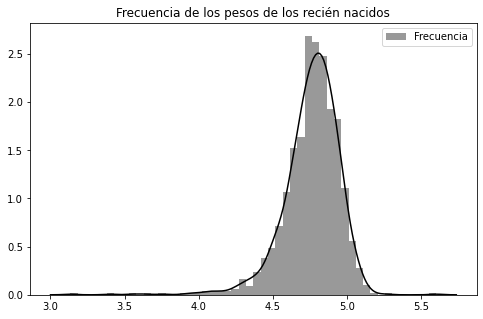

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(pesos['lbwght'], label = "Frecuencia", color = 'black')
plt.title('Frecuencia de los pesos de los recién nacidos')
plt.legend()
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, 'Densidad')

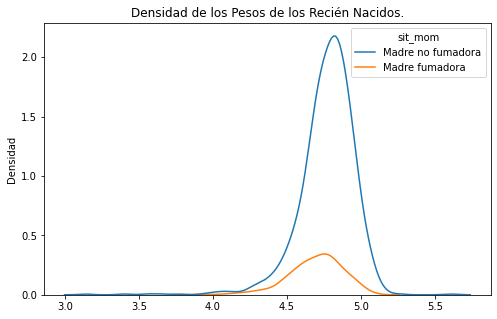

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=pesos, x="lbwght", hue="sit_mom")
plt.title("Densidad de los Pesos de los Recién Nacidos.")
plt.xlabel("")
plt.ylabel("Densidad")

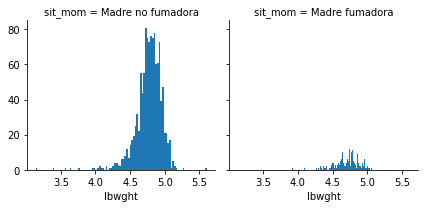

In [9]:
figure1 = sns.FacetGrid(pesos, col="sit_mom", margin_titles=True)
figure1.map(plt.hist, 'lbwght', bins=100)     # to show the hsitogram of moms with the weight of baby

### Regular expresión y Geocoding

In [60]:
import numpy as np
import re
import pandas as pd
from pandas import DataFrame

In [81]:
cent_salud = pd.read_excel(r"../../data/Centro_salud/Centro_salud_mental.xls")
cent_salud

,Departamento,Provincia,Distrito,UBIGEO,Dirección,Institución_ruc
0,CALLAO,CALLAO,LA PERLA,70104,AVENIDA LA PAZ CUADRA 3 LA PERLA CALLAO CALLAO,GOBIERNO REGIONAL 20147907487
1,LIMA,LIMA,RIMAC,150128,Calle Los Virreyes 205. Urbanización El Manzan...,MINSA 20602217508
2,AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,40129,AVENIDA CARACAS NÚMERO 807 URBANIZACIÓN SIMÓN ...,GOBIERNO REGIONAL 20172661794
3,LIMA,LIMA,COMAS,150110,Los Rosales Mz G8 Lt 02 altura de la 33 de la ...,MINSA 20602217508
4,LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,Mz Z1 Antenor Orrego - Rio Seco. Ref. Casa Bla...,GOBIERNO REGIONAL 20218911189
5,LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA,130103,CALLE 20 DE JUNIO CUADRA 09 BARRIO 06 S/N FLO...,GOBIERNO REGIONAL 20218911189
6,LA LIBERTAD,TRUJILLO,EL PORVENIR,130102,OTROS MANUEL UBALDE NÚMERO 679 DISTRITO EL POR...,GOBIERNO REGIONAL 20218911189
7,LA LIBERTAD,TRUJILLO,TRUJILLO,130101,AVENIDA CESAR VALLEJO/ MZ 45 AA. HH. HUERTA BE...,GOBIERNO REGIONAL 20218911189
8,APURIMAC,ANDAHUAYLAS,TALAVERA,30216,AVENIDA 28 DE JULIO 296 1 AL COSTADO DEL MERCA...,GOBIERNO REGIONAL 20199917928
9,LORETO,LORETO,NAUTA,160301,CALLE MARAÑON NÚMERO S/N DISTRITO NAUTA PROVIN...,GOBIERNO REGIONAL


In [98]:
gobiernos = cent_salud.loc[cent_salud['Institución_ruc'].str.contains('GOBIERNO')]

In [99]:
gobiernos1 = gobiernos["Institución_ruc"].str.split("REGIONAL",2,expand=True)
gobiernos1 = gobiernos1.rename(columns={0:'Institución de Gobierno Regional'})
gobiernos1 = gobiernos1.rename(columns={1:'RUC'})
gobiernos1

,Institución de Gobierno Regional,RUC
0,GOBIERNO,20147907487
2,GOBIERNO,20172661794
4,GOBIERNO,20218911189
5,GOBIERNO,20218911189
6,GOBIERNO,20218911189
7,GOBIERNO,20218911189
8,GOBIERNO,20199917928
9,GOBIERNO,
12,GOBIERNO,20172661794
13,GOBIERNO,20490215850


In [96]:
minsa = cent_salud.loc[cent_salud['Institución_ruc'].str.contains('MINSA')]

In [97]:
minsa1 = minsa["Institución_ruc"].str.split(" ",2,expand=True)
minsa1 = minsa1.rename(columns={0:'Institución'})
minsa1 = minsa1.rename(columns={1:'RUC'})
minsa1

,Institución,RUC
1,MINSA,20602217508
3,MINSA,20602217508
10,MINSA,20602251641
11,MINSA,20602250602
17,MINSA,20602217508
28,MINSA,20602250602
35,MINSA,20602251641
45,MINSA,20602250602
52,MINSA,20602236596


###### Use la base de datos mental_health_center para crear columnas con las coordenadas geográficas y la dirección proporcionada por Google map